# Chapter 4 - Introduction to Autoregressive and Automated Methods for Time Series Forecasting

In [1]:
import datetime as dt
import os
import shutil
import warnings
from collections import UserDict
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from common.utils import load_data, mape
from IPython.display import Image

%matplotlib inline

pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [2]:
data_dir = "./data"
ts_data_load = load_data(data_dir)[["load"]]
ts_data_load.head()

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"


## Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

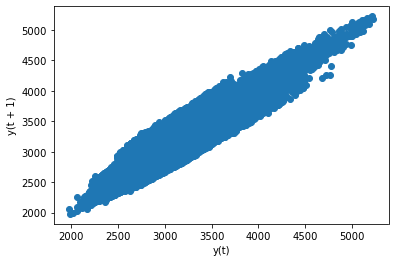

In [3]:
from pandas.plotting import lag_plot

plt.figure()

lag_plot(ts_data_load)

## Autocorrelation plot

### Autocorrelation Plot Results from ts_data_load dataset

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

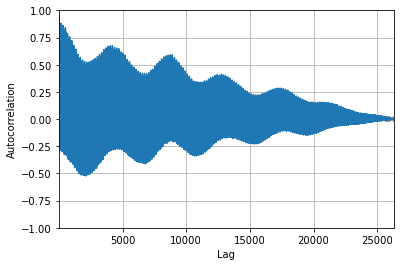

In [4]:
from pandas.plotting import autocorrelation_plot

plt.figure()

autocorrelation_plot(ts_data_load)

### Autocorrelation Plot Results from ts_data_load_subset (First week of August 2014)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

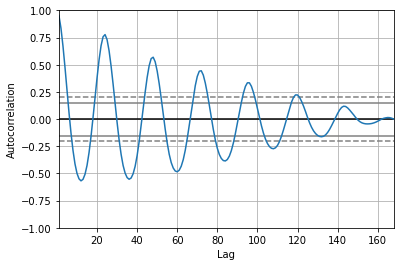

In [5]:
ts_data_load = load_data("data/")[["load"]]
ts_data_load.head()

ts_data_load_subset = ts_data_load["2014-08-01":"2014-08-07"]

from pandas.plotting import autocorrelation_plot

plt.figure()

autocorrelation_plot(ts_data_load_subset)

### Autocorrelation function (acf) plot on ts_data_load dataset

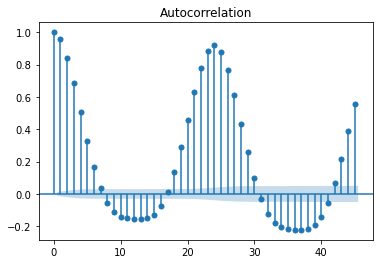

In [6]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_data_load)
pyplot.show()

### Autocorrelation function (acf) plot on ts_data_load subset

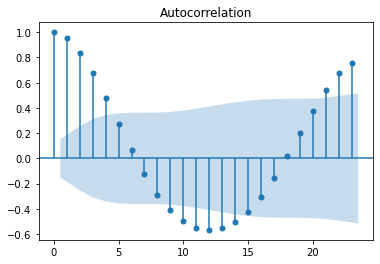

In [7]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_data_load_subset)
pyplot.show()

### Partial correlation function (pacf) plot on ts_data_load dataset

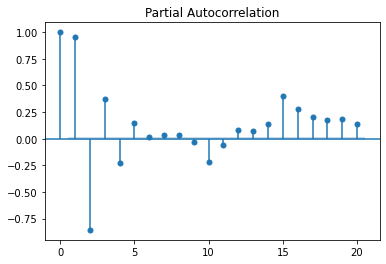

In [8]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ts_data_load, lags=20)
pyplot.show()

### Partial correlation function (pacf) plot on ts_data_load subset

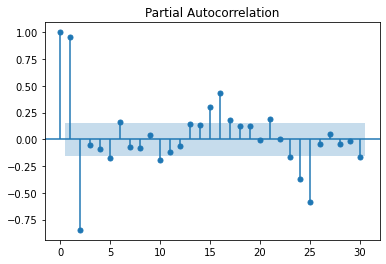

In [9]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ts_data_load_subset, lags=30)
pyplot.show()

## Autoregressive method class in Statsmodels

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [11]:
model = AutoReg(ts_data_load['load'], 1)
results = model.fit()
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:                   load   No. Observations:                26304
Model:                     AutoReg(1)   Log Likelihood             -171639.978
Method:               Conditional MLE   S.D. of innovations            165.100
Date:                Sun, 02 Jan 2022   AIC                             10.213
Time:                        16:14:48   BIC                             10.214
Sample:                    01-01-2012   HQIC                            10.214
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    144.5181      6.043     23.913      0.000     132.673     156.363
load.L1        0.9563      0.002    530.344      0.000       0.953       0.960
                                    Roots           

#### Note: AutoReg supports describing the same covariance estimators as OLS. Below, we use cov_type="HC0", which is White’s covariance estimator. While the parameter estimates are the same, all of the quantities that depend on the standard error change.

In [12]:
res = model.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                   load   No. Observations:                26304
Model:                     AutoReg(1)   Log Likelihood             -171639.978
Method:               Conditional MLE   S.D. of innovations            165.100
Date:                Sun, 02 Jan 2022   AIC                             10.213
Time:                        16:14:48   BIC                             10.214
Sample:                    01-01-2012   HQIC                            10.214
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    144.5181      5.364     26.945      0.000     134.006     155.030
load.L1        0.9563      0.002    618.131      0.000       0.953       0.959
                                    Roots           

In [13]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure", figsize=(16, 6))

No handles with labels found to put in legend.


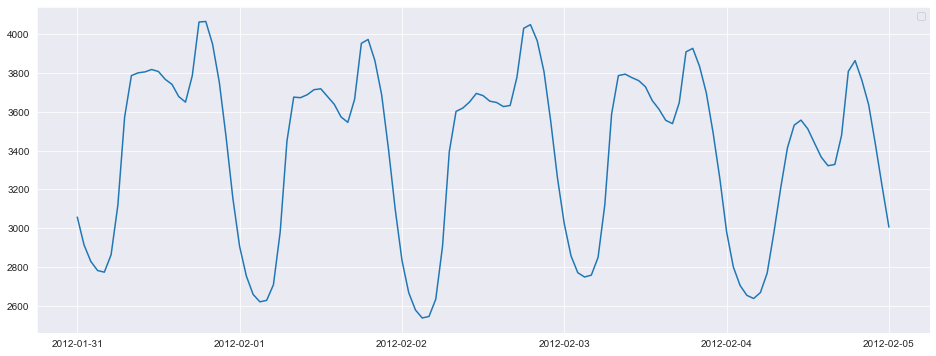

In [14]:
fig = res.plot_predict(720, 840)

In [15]:
fig = plt.figure(figsize=(16, 9))

<Figure size 1152x648 with 0 Axes>

In [16]:
fig = res.plot_diagnostics(fig=fig, lags=20)

### Prepare the ts_data_load dataset for forecasting task with AutoReg() function

In [17]:
train_start_dt = "2014-11-01 00:00:00"
test_start_dt = "2014-12-30 00:00:00"

In [18]:
train = ts_data_load.copy()[
    (ts_data_load.index >= train_start_dt) & (ts_data_load.index < test_start_dt)
][["load"]]
test = ts_data_load.copy()[ts_data_load.index >= test_start_dt][["load"]]

print("Training data shape: ", train.shape)
print("Test data shape: ", test.shape)

Training data shape:  (1416, 1)
Test data shape:  (48, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
train["load"] = scaler.fit_transform(train)
train.head()

,load
2014-11-01 00:00:00,0.10
2014-11-01 01:00:00,0.07
2014-11-01 02:00:00,0.05
2014-11-01 03:00:00,0.04
2014-11-01 04:00:00,0.06


In [21]:
test["load"] = scaler.transform(test)
test.head()

,load
2014-12-30 00:00:00,0.33
2014-12-30 01:00:00,0.29
2014-12-30 02:00:00,0.27
2014-12-30 03:00:00,0.27
2014-12-30 04:00:00,0.30


In [22]:
HORIZON = 3
print("Forecasting horizon:", HORIZON, "hours")

Forecasting horizon: 3 hours


In [23]:
test_shifted = test.copy()

for t in range(1, HORIZON):
    test_shifted["load+" + str(t)] = test_shifted["load"].shift(-t, freq="H")

test_shifted = test_shifted.dropna(how="any")
test_shifted.head(5)

,load,load+1,load+2
2014-12-30 00:00:00,0.33,0.29,0.27
2014-12-30 01:00:00,0.29,0.27,0.27
2014-12-30 02:00:00,0.27,0.27,0.30
2014-12-30 03:00:00,0.27,0.30,0.41
2014-12-30 04:00:00,0.30,0.41,0.57


In [24]:
%%time
training_window = 720

train_ts = train["load"]
test_ts = test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = list()

for t in range(test_ts.shape[0]):
    model = AutoReg(history, 1)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t + 1, ": predicted =", yhat, "expected =", obs)

2014-12-30 00:00:00
1 : predicted = [0.42 0.42 0.43] expected = [0.32945389435989236, 0.2900626678603402, 0.2739480752014323]
2014-12-30 01:00:00
2 : predicted = [0.34 0.35 0.36] expected = [0.2900626678603402, 0.2739480752014323, 0.26812891674127126]
2014-12-30 02:00:00
3 : predicted = [0.3  0.31 0.33] expected = [0.2739480752014323, 0.26812891674127126, 0.3025962399283795]
2014-12-30 03:00:00
4 : predicted = [0.29 0.3  0.31] expected = [0.26812891674127126, 0.3025962399283795, 0.40823634735899716]
2014-12-30 04:00:00
5 : predicted = [0.28 0.3  0.31] expected = [0.3025962399283795, 0.40823634735899716, 0.5689346463742166]
2014-12-30 05:00:00
6 : predicted = [0.31 0.33 0.34] expected = [0.40823634735899716, 0.5689346463742166, 0.6799462846911368]
2014-12-30 06:00:00
7 : predicted = [0.41 0.42 0.43] expected = [0.5689346463742166, 0.6799462846911368, 0.7309758281110115]
2014-12-30 07:00:00
8 : predicted = [0.57 0.56 0.56] expected = [0.6799462846911368, 0.7309758281110115, 0.75111906893

## Autoregressive Integrated Moving Average method in Statsmodels

In [25]:
import datetime as dt
import math
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from common.utils import load_data, mape
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [26]:
data_dir = "./data"
ts_data_load = load_data(data_dir)[["load"]]
ts_data_load.head(10)

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"
2012-01-01 05:00:00,"2,453.00"
2012-01-01 06:00:00,"2,560.00"
2012-01-01 07:00:00,"2,719.00"
2012-01-01 08:00:00,"2,916.00"
2012-01-01 09:00:00,"3,105.00"


In [27]:
train_start_dt = "2014-11-01 00:00:00"
test_start_dt = "2014-12-30 00:00:00"

In [28]:
train = ts_data_load.copy()[
    (ts_data_load.index >= train_start_dt) & (ts_data_load.index < test_start_dt)
][["load"]]
test = ts_data_load.copy()[ts_data_load.index >= test_start_dt][["load"]]

print("Training data shape: ", train.shape)
print("Test data shape: ", test.shape)

Training data shape:  (1416, 1)
Test data shape:  (48, 1)


In [29]:
scaler = MinMaxScaler()
train["load"] = scaler.fit_transform(train)
train.head()

,load
2014-11-01 00:00:00,0.10
2014-11-01 01:00:00,0.07
2014-11-01 02:00:00,0.05
2014-11-01 03:00:00,0.04
2014-11-01 04:00:00,0.06


In [30]:
test["load"] = scaler.transform(test)
test.head()

,load
2014-12-30 00:00:00,0.33
2014-12-30 01:00:00,0.29
2014-12-30 02:00:00,0.27
2014-12-30 03:00:00,0.27
2014-12-30 04:00:00,0.30


In [31]:
HORIZON = 3
print("Forecasting horizon:", HORIZON, "hours")

Forecasting horizon: 3 hours


In [32]:
order = (4, 1, 0)
seasonal_order = (1, 1, 0, 24)

In [33]:
model = SARIMAX(endog=train, order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               load   No. Observations:                 1416
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 24)   Log Likelihood                3477.239
Date:                            Sun, 02 Jan 2022   AIC                          -6942.479
Time:                                    16:14:57   BIC                          -6911.052
Sample:                                11-01-2014   HQIC                         -6930.727
                                     - 12-29-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8402      0.016     52.199      0.000       0.809       0.872
ar.L2         -0.5216      0.034   

In [34]:
test_shifted = test.copy()

for t in range(1, HORIZON):
    test_shifted["load+" + str(t)] = test_shifted["load"].shift(-t, freq="H")

test_shifted = test_shifted.dropna(how="any")
test_shifted.head(5)

,load,load+1,load+2
2014-12-30 00:00:00,0.33,0.29,0.27
2014-12-30 01:00:00,0.29,0.27,0.27
2014-12-30 02:00:00,0.27,0.27,0.30
2014-12-30 03:00:00,0.27,0.30,0.41
2014-12-30 04:00:00,0.30,0.41,0.57


In [35]:
%%time
training_window = 720

train_ts = train["load"]
test_ts = test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = list()

order = (2, 1, 0)
seasonal_order = (1, 1, 0, 24)

for t in range(test_ts.shape[0]):
    model = SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t + 1, ": predicted =", yhat, "expected =", obs)

2014-12-30 00:00:00
1 : predicted = [0.32 0.29 0.28] expected = [0.32945389435989236, 0.2900626678603402, 0.2739480752014323]
2014-12-30 01:00:00
2 : predicted = [0.3  0.29 0.3 ] expected = [0.2900626678603402, 0.2739480752014323, 0.26812891674127126]
2014-12-30 02:00:00
3 : predicted = [0.27 0.28 0.32] expected = [0.2739480752014323, 0.26812891674127126, 0.3025962399283795]
2014-12-30 03:00:00
4 : predicted = [0.28 0.32 0.42] expected = [0.26812891674127126, 0.3025962399283795, 0.40823634735899716]
2014-12-30 04:00:00
5 : predicted = [0.3  0.39 0.54] expected = [0.3025962399283795, 0.40823634735899716, 0.5689346463742166]
2014-12-30 05:00:00
6 : predicted = [0.4  0.55 0.67] expected = [0.40823634735899716, 0.5689346463742166, 0.6799462846911368]
2014-12-30 06:00:00
7 : predicted = [0.57 0.68 0.75] expected = [0.5689346463742166, 0.6799462846911368, 0.7309758281110115]
2014-12-30 07:00:00
8 : predicted = [0.68 0.75 0.8 ] expected = [0.6799462846911368, 0.7309758281110115, 0.75111906893

In [36]:
eval_df = pd.DataFrame(
    predictions, columns=["t+" + str(t) for t in range(1, HORIZON + 1)]
)
eval_df["timestamp"] = test.index[0 : len(test.index) - HORIZON + 1]
eval_df = pd.melt(eval_df, id_vars="timestamp", value_name="prediction", var_name="h")
eval_df["actual"] = np.array(np.transpose(test_ts)).ravel()
eval_df[["prediction", "actual"]] = scaler.inverse_transform(
    eval_df[["prediction", "actual"]]
)
eval_df.head()

,timestamp,h,prediction,actual
0,2014-12-30 00:00:00,t+1,"3,008.87","3,023.00"
1,2014-12-30 01:00:00,t+1,"2,955.22","2,935.00"
2,2014-12-30 02:00:00,t+1,"2,900.21","2,899.00"
3,2014-12-30 03:00:00,t+1,"2,917.76","2,886.00"
4,2014-12-30 04:00:00,t+1,"2,946.96","2,963.00"


In [37]:
if HORIZON > 1:
    eval_df["APE"] = (eval_df["prediction"] - eval_df["actual"]).abs() / eval_df[
        "actual"
    ]
    print(eval_df.groupby("h")["APE"].mean())

h
t+1   0.01
t+2   0.01
t+3   0.02
Name: APE, dtype: float64


In [38]:
print(
    "One-step forecast MAPE: ",
    (
        mape(
            eval_df[eval_df["h"] == "t+1"]["prediction"],
            eval_df[eval_df["h"] == "t+1"]["actual"],
        )
    )
    * 100,
    "%",
)

One-step forecast MAPE:  0.5567678831569114 %


In [39]:
print(
    "Multi-step forecast MAPE: ",
    mape(eval_df["prediction"], eval_df["actual"]) * 100,
    "%",
)

Multi-step forecast MAPE:  1.144688366510444 %
